In [26]:
import os
import sys

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

sys.path.append(os.path.abspath(r"C:\Users\shailaja.akella\Documents\Github\dynamic_routing_analysis\src"))
sys.path.append(os.path.abspath(r"C:\Users\shailaja.akella\Documents\Github\dynamic_routing_analysis\src\dynamic_routing_analysis"))

from collections.abc import Iterable, Mapping
from typing import Any, Literal

import ccf_utils
import numpy.typing as npt
import plot_utils as pu


In [4]:
df = pd.read_pickle(r"C:\Users\shailaja.akella\OneDrive - Allen Institute\DR\GLM_gen2\results\orthogonalization_quiescent\df_ortho_quiescent.pkl")

df.head(5)

,r2_fullmodel_O,unit_id,session_id,areas,av_dprime,r2_context_O,r2_fullmodel,r2_context,drop_score_O,drop_score
0,0.013913,636766_2023-01-25_A-4,636766_2023-01-25,LP,1.559467,0.013964,0.013913,0.013940,0.0,0.00000
1,0.005671,636766_2023-01-25_A-13,636766_2023-01-25,LP,1.559467,0.004943,0.005670,0.005427,0.0,0.04292
2,0.001782,636766_2023-01-25_A-26,636766_2023-01-25,LP,1.559467,0.001663,0.001782,0.001735,0.0,0.00000
3,0.000792,636766_2023-01-25_A-27,636766_2023-01-25,LP,1.559467,0.000663,0.000804,0.000419,0.0,0.00000
4,-0.001700,636766_2023-01-25_A-34,636766_2023-01-25,DG,1.559467,-0.001882,-0.001686,-0.001978,0.0,0.00000


In [29]:

def plot_brain_heatmap( 
    regions: Iterable[str] | npt.ArrayLike,
    values: Iterable[float] | npt.ArrayLike,
    projection: str = 'saggital',
    coord: float | None = None,
    cmap: str = "viridis",
    clevels: tuple[float, float] | None = None,
    patch_params: Mapping[str, Any] = {},
    missing_params: Mapping[str, Any] = {},
    plane_line_params: Mapping[str, Any] = {},
    fig: matplotlib.figure.Figure | None = None,
    ):
    
    missing_kwds = (
        {"color": "lightgrey"}
        | {k: v for k, v in patch_params.items() if k in ("edgecolor", "linewidth")}
        | missing_params
    )

    vol = ccf_utils.get_ccf_volume(True, True)
    max_ap = vol.shape[2] * ccf_utils.RESOLUTION_UM
    max_dv = vol.shape[1] * ccf_utils.RESOLUTION_UM
    max_ml = vol.shape[0] * ccf_utils.RESOLUTION_UM

    height_top = max_ap
    height_sagittal = max_dv

    gs = matplotlib.gridspec.GridSpec(
        3,
        1,
        figure=fig,
        height_ratios=[height_top / height_sagittal]
        + [1]
        + [0.1],
    )

    
    ax = fig.add_subplot(gs[0, 0])

    norm = matplotlib.colors.Normalize(vmin=clevels[0], vmax=clevels[1])
    gdf = pu.get_heatmap_gdf(
        regions=regions,
        values=values,
        projection=projection,
        position=coord,
    )
    gdf.plot(
        column="value",
        cmap=cmap,
        missing_kwds=missing_kwds,
        ax=ax,
        norm=norm,
        **patch_params,
    )
    ax.set_xlim(0, max_ap)
    ax.set_ylim(0, max_dv)
    ax.invert_yaxis()
    
    axlinefunc = ax.axhline
    axlinefunc(
        coord, **{"color": "k", "linestyle": "--", "lw": 0.1} | plane_line_params
    )

    ax.set_xlim(0, max_ap)
    ax.set_ylim(0, max_ml)

    ax_cbar = fig.add_subplot(gs[1, 0])

    fig.colorbar(
        matplotlib.cm.ScalarMappable(
            norm=matplotlib.colors.Normalize(*clevels),
            cmap=cmap,
        ),
        ax=ax_cbar,
        fraction=0.5,
        orientation="horizontal",
        location="bottom",
    )

    ax.set_aspect(1)
    ax.set_axis_off()
    ax.set_clip_on(False)
        
    return ax

 'fiber tracts' 'root']


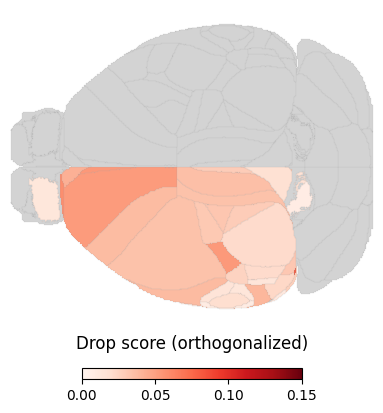

In [42]:
df_area = df.groupby('areas')['drop_score_O'].mean()

pu.plot_brain_heatmap(values=df_area.values, 
                   regions=df_area.index,
                   cmap = 'Reds',
                   clevels = (0, 0.15));
plt.title('Drop score (orthogonalized)')
plt.savefig(r"C:\Users\shailaja.akella\Dropbox (Personal)\DR\GLM_gen2\figures/sagittal_ortho.png", dpi=300)

 'fiber tracts' 'root']


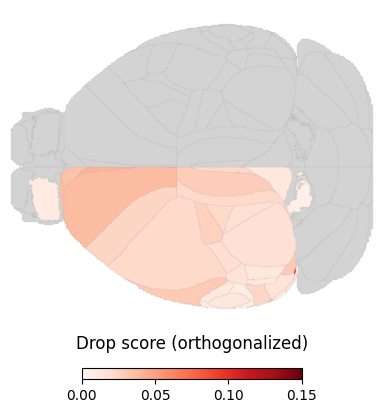

In [43]:
df_area = df.groupby('areas')['drop_score'].mean()

pu.plot_brain_heatmap(values=df_area.values, 
                   regions=df_area.index,
                   cmap = 'Reds',
                   clevels = (0, 0.15));
plt.title('Drop score (orthogonalized)')
plt.savefig(r"C:\Users\shailaja.akella\Dropbox (Personal)\DR\GLM_gen2\figures/sagittal_no_ortho.png", dpi=300)